## See the signal in the data ##

Because GW150914 was relatively loud, it is readily visible in the data. 

In [ ]:
import sys
!{sys.executable} -m pip install lalsuite=='6.48.1.dev20180620' pycbc

In [1]:
#Set up the libraries we need and download the data
!curl -O -J https://raw.githubusercontent.com/ligo-cbc/binder/master/H-H1_LOSC_4_V2-1126259446-32.gwf
!curl -O -J https://raw.githubusercontent.com/ligo-cbc/binder/master/L-L1_LOSC_4_V2-1126259446-32.gwf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1005k  100 1005k    0     0  4051k      0 --:--:-- --:--:-- --:--:-- 4069k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  972k  100  972k    0     0  1480k      0 --:--:-- --:--:-- --:--:-- 1482k


### See GW150914 in the time series ###

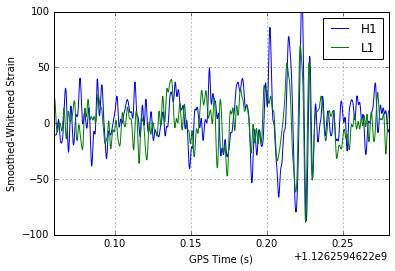

In [2]:
%matplotlib inline
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.psd import welch, interpolate
import pylab

for ifo in ['H1', 'L1']:
    # Read data: The data is available to the public through losc.ligo.org!
    fname = '%s-%s_LOSC_4_V2-1126259446-32.gwf' % (ifo[0], ifo)
    ts = read_frame(fname, '%s:LOSC-STRAIN' % ifo)
    
    # Estimate the noise spectrum and use it to whiten the data
    psd = interpolate(welch(ts), 1.0 / ts.duration)
    white_strain = (ts.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove frequencies below and above where the main portion of the signal lies
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(smooth, 300, 8)

    # time shift and flip L1 to match the time of arrival and phase of Hanford
    if ifo == 'L1':
        smooth *= -1
        smooth.roll(int(.007 / smooth.delta_t))

    pylab.plot(smooth.sample_times.numpy(), smooth.numpy(), label=ifo)

# Plot the region around the signal (time is in gps seconds)
pylab.legend()
pylab.xlim(1126259462.26, 1126259462.48)
pylab.ylabel('Smoothed-Whitened Strain')
pylab.grid()
pylab.ylim(-100, 100)
pylab.xlabel('GPS Time (s)')
pylab.show()

### See the time frequency evolution of GW150914 in Hanford ###

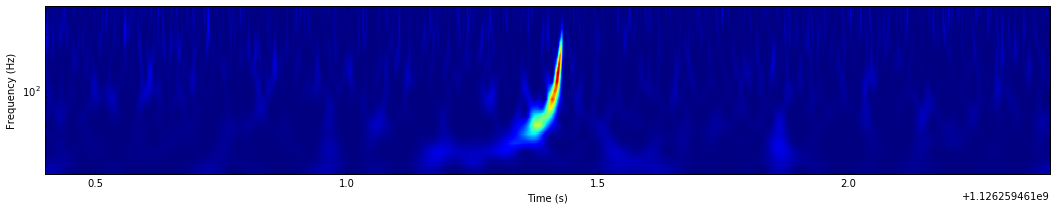

In [3]:
ts = read_frame('H-H1_LOSC_4_V2-1126259446-32.gwf', 'H1:LOSC-STRAIN', duration=32)

ts = ts.whiten(4, 4)
zoom = ts.time_slice(1126259462.4 - 1, 1126259462.4 + 1)
times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))

pylab.figure(figsize=(18, 3))
pylab.pcolormesh(times, freqs, power)
pylab.ylim(20, 512)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.xlim(times.min(), times.max())
pylab.yscale('log')

### See the time frequency evolution of GW150914 in Livingston ###

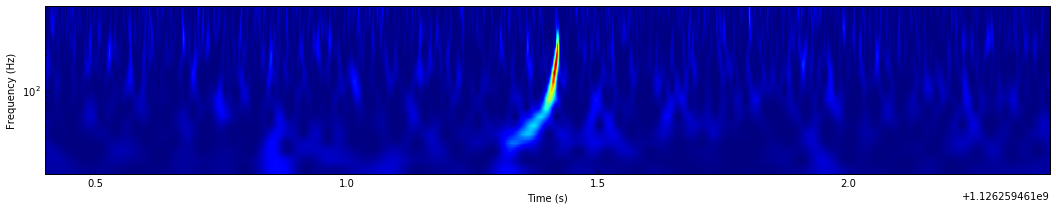

In [4]:
ts = read_frame('L-L1_LOSC_4_V2-1126259446-32.gwf', 'L1:LOSC-STRAIN', duration=32)

ts = ts.whiten(4, 4)
zoom = ts.time_slice(1126259462.4 - 1, 1126259462.4 + 1)
times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))

pylab.figure(figsize=(18, 3))
pylab.pcolormesh(times, freqs, power)
pylab.ylim(20, 512)
pylab.xlabel('Time (s)')
pylab.ylabel('Frequency (Hz)')
pylab.xlim(times.min(), times.max())
pylab.yscale('log')